In [1]:
import numpy as np

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv("StudentsPerformance.csv")

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# DATA MANIPULATION AND CLEANING OF DATA

In [9]:
new_df = df.select_dtypes(include=['object']).copy()

In [10]:
new_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [11]:
new_df.isnull().sum()
# column wise distribution of null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
dtype: int64

In [15]:
new_df.isnull().values.sum()
#total number of missing value in data frame.

0

In [16]:
new_df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [18]:
new_df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [27]:
new_df = new_df.rename(columns={'race/ethnicity':'Group','parental level of education':'Parent Education',
                       'test preparation course':'Course'})

In [29]:
new_df.head()

,gender,Group,Parent Education,lunch,Course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [30]:
new_df = new_df.rename(columns={'lunch':'Lunch','gender':'Gender'})

In [31]:
new_df.head()

,Gender,Group,Parent Education,Lunch,Course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [87]:
replace_map={'Group':{'group A':1,'group B':2,'group C' :3,'group D': 4, 'group E':5}}

In [89]:
print(replace_map)

{'Group': {'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5}}


In [90]:
new_df.replace(replace_map,inplace=True)

In [91]:
new_df.head()

,Gender,Group,Parent Education,Lunch,Course
0,F,2,BD,S,N
1,F,3,SC,S,C
2,F,2,MD,S,N
3,M,1,AD,F,N
4,M,3,SC,S,N


In [92]:
replace_gender={'Gender':{'male':'M','female':'F',}}

In [93]:
new_df.replace(replace_gender,inplace=True)

In [94]:
replace_parented={'Parent Education':{'bachelor\'s degree':'BD','some college':'SC','master\'s degree':'MD',
                                      'associate\'s degree':'AD','high school':'HC','some high school': 'SHC'}}

In [95]:
new_df.replace(replace_parented,inplace=True)

In [96]:
new_df.head()

,Gender,Group,Parent Education,Lunch,Course
0,F,2,BD,S,N
1,F,3,SC,S,C
2,F,2,MD,S,N
3,M,1,AD,F,N
4,M,3,SC,S,N


In [97]:
replace_lunch={'Lunch':{'standard':'S','free/reduced':'F'}}
replace_course={'Course':{'none':'N','completed':'C',}}

In [98]:
new_df.replace(replace_lunch,inplace=True)

In [99]:
new_df.replace(replace_course,inplace=True)

In [100]:
new_df.head()

,Gender,Group,Parent Education,Lunch,Course
0,F,2,BD,S,N
1,F,3,SC,S,C
2,F,2,MD,S,N
3,M,1,AD,F,N
4,M,3,SC,S,N


In [101]:
score_df = df.select_dtypes(include=['int64']).copy()

In [102]:
score_df.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [103]:
score_df = score_df.rename(columns={'math score':'Math','reading score':'Reading','writing score':'Writing'})

In [104]:
score_df.head()

,Math,Reading,Writing
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [105]:
student_df = pd.concat([new_df, score_df], axis=1)

In [106]:
student_df.head()

,Gender,Group,Parent Education,Lunch,Course,Math,Reading,Writing
0,F,2,BD,S,N,72,72,74
1,F,3,SC,S,C,69,90,88
2,F,2,MD,S,N,90,95,93
3,M,1,AD,F,N,47,57,44
4,M,3,SC,S,N,76,78,75


In [107]:
student_df.to_csv('studentperformance01.csv')

# Data Visualisation

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

number of female: 518
number of male:  482


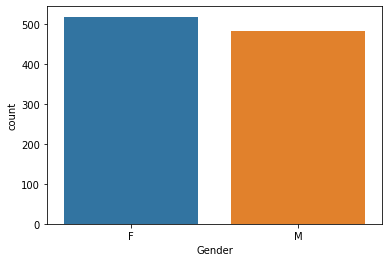

In [109]:
sns.countplot(x = "Gender", data =student_df)
print('number of female:',len(student_df[student_df['Gender']=='F']))
print('number of male: ',len(student_df[student_df['Gender']=='M']))

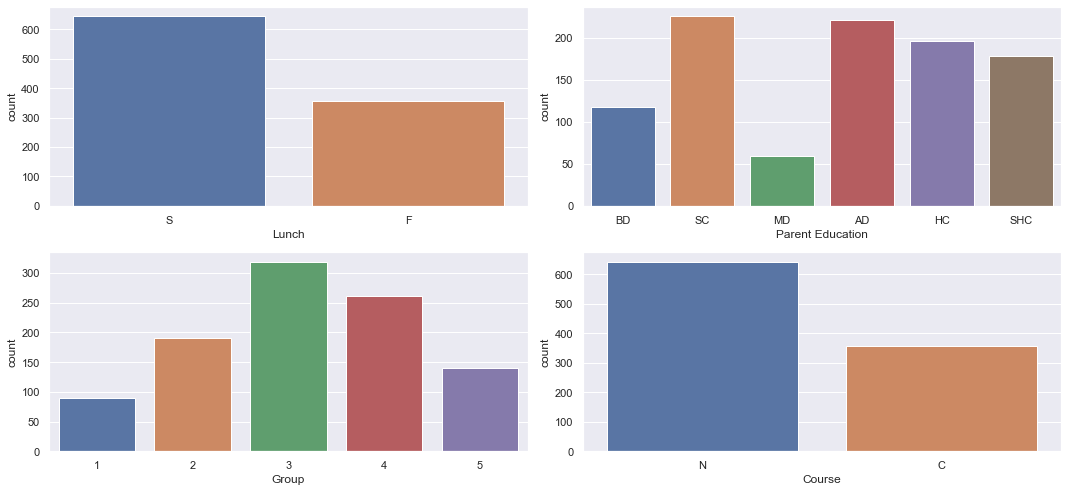

In [113]:
sns.set()
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.countplot(x="Lunch",data = student_df)
plt.subplot(2,2,2)
sns.countplot(x="Parent Education", data= student_df)
plt.subplot(2,2,3)
sns.countplot(x="Group", data= student_df)
plt.subplot(2,2,4)
sns.countplot(x="Course", data= student_df)
plt.tight_layout()


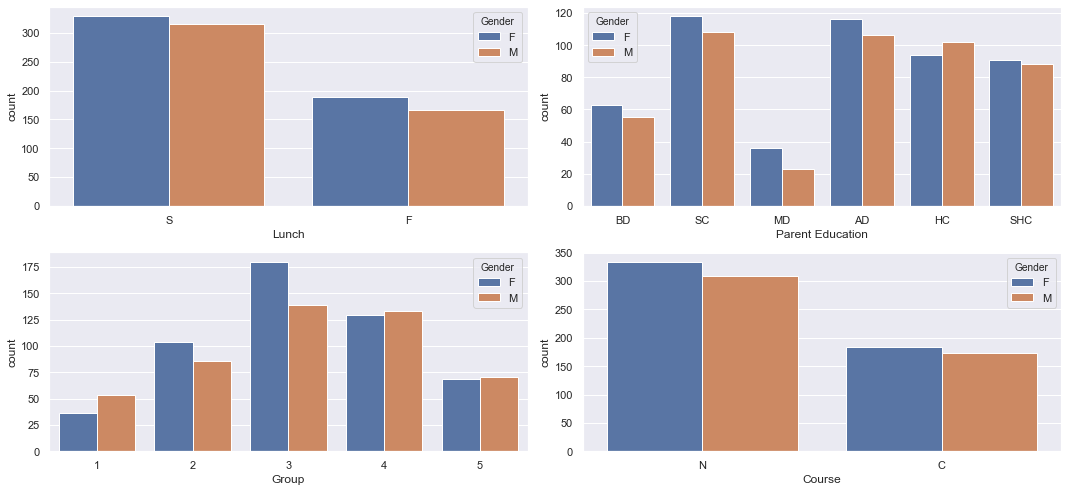

In [116]:
# Distribution of 
sns.set()
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.countplot(x="Lunch",hue="Gender",data = student_df)
plt.subplot(2,2,2)
sns.countplot(x="Parent Education",hue="Gender", data= student_df)
plt.subplot(2,2,3)
sns.countplot(x="Group",hue="Gender", data= student_df)
plt.subplot(2,2,4)
sns.countplot(x="Course",hue="Gender", data= student_df)
plt.tight_layout()


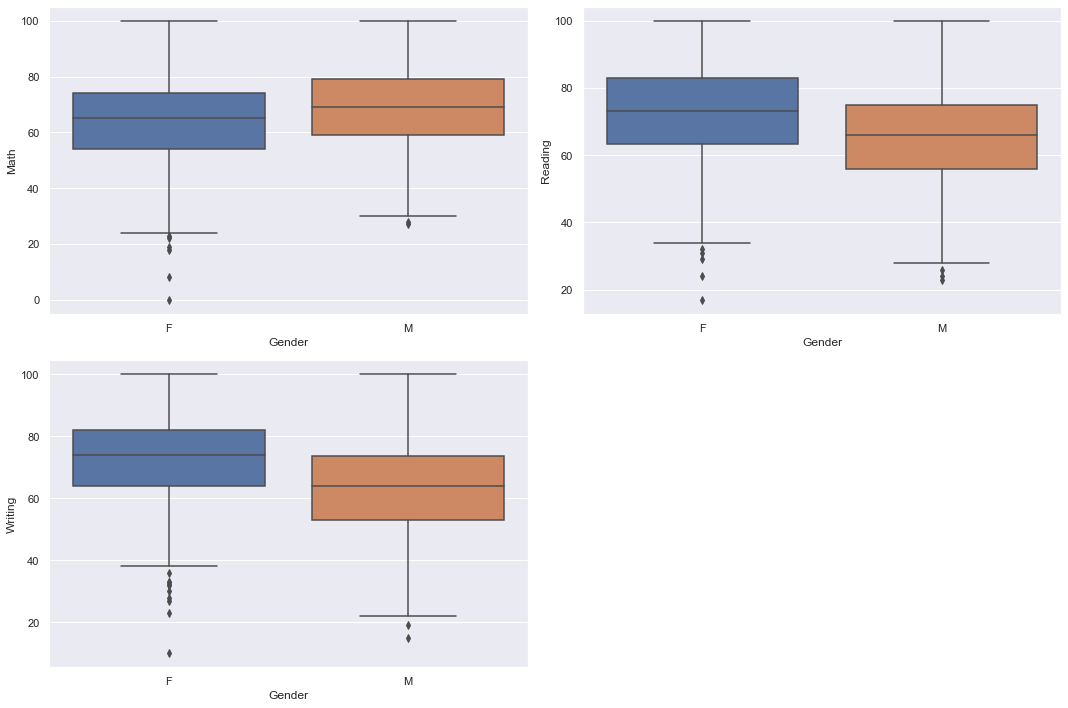

In [120]:
# Distribution of scores based on gender
sns.set()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x="Gender",y="Math",data = student_df)
plt.subplot(2,2,2)
sns.boxplot(x="Gender",y="Reading", data= student_df)
plt.subplot(2,2,3)
sns.boxplot(x="Gender", y="Writing", data= student_df)
plt.tight_layout()

In [ ]:
# Female have higher score in Reading and Writing than Male.
# Male have higher score in Math than Female.

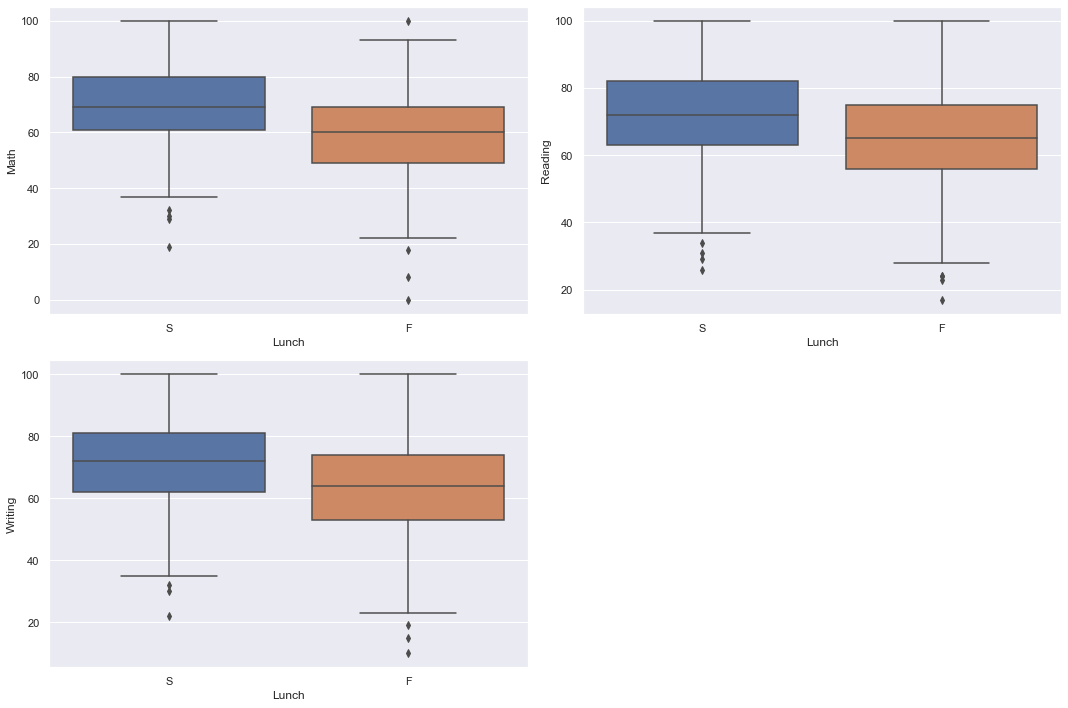

In [121]:
# Distribution of scores based on lunch
sns.set()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x="Lunch",y="Math",data = student_df)
plt.subplot(2,2,2)
sns.boxplot(x="Lunch",y="Reading", data= student_df)
plt.subplot(2,2,3)
sns.boxplot(x="Lunch", y="Writing", data= student_df)
plt.tight_layout()

In [ ]:
# Student who have their lunch as standerd have compartively more marks than students whose lunch are free or reduced.

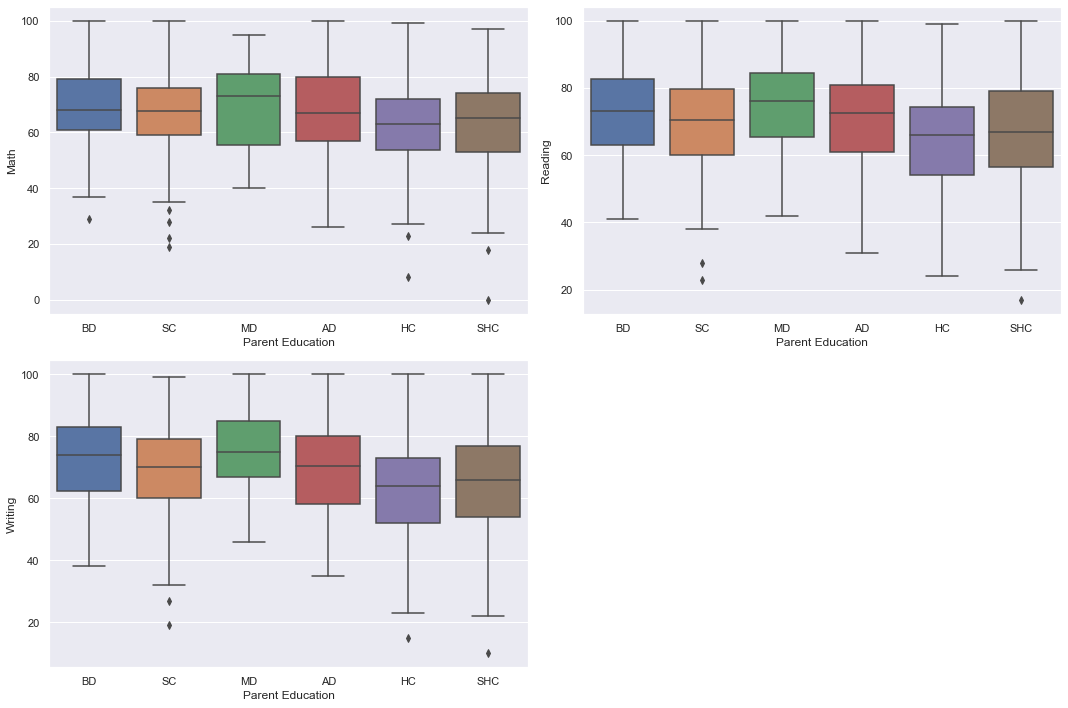

In [123]:
# Distribution of scores based on Parental Education
sns.set()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x="Parent Education",y="Math",data = student_df)
plt.subplot(2,2,2)
sns.boxplot(x="Parent Education",y="Reading", data= student_df)
plt.subplot(2,2,3)
sns.boxplot(x="Parent Education", y="Writing", data= student_df)
plt.tight_layout()

In [ ]:
# When Parent Education is High  School(HC) /Some Home School(SHC)/Some College(SC) then the students tend to have low score.